# Practica 2: Mejoramiento de la imagen

## 1. Objetivos:
El alumno:
* Aprendera a mejorar la imagen de acuerdo a las modificaciones que se le realizan originalmente.
* Entendera aumentar las caracteristicas de contraste, perfilado que apoyen a una mejor medicion.

## 2. Introduccion
En el proceso de adquisicion de una imagen, esta se puede contaminar con distintos tipos de ruido: gaussiano, impulsivo (sal y pimienta), frecuencial, multiplicativo, etc. Para poder eliminar el ruido se debe hacer un filtrado de la imagen, donde dependiendo del tipo de ruido es el filtro que debe ser usado.  

En esta practica se cuenta con una imagen que se obtuvo mediante una resonancia magnetica y se puede observar el cerebro de un paciente. A esta imagen se le a;adio ruido impulsivo y debemos restaurarla mediante el uso del filtro mas apropiado que es el kernel de mediana. 



## 3. Desarrollo

In [2]:
import cv2
import sklearn
import skimage.io
import numpy as np
from scipy import ndimage
from scipy import signal
import matplotlib.pyplot as plt
% matplotlib inline

 ## Parte A:
 1. Restauracion del nivel de contraste
 2. Eliminar ruido sal y pimienta

In [3]:
# Leer imagen original
imOriginal = cv2.imread('midbrain.png', 0)

In [4]:
# Leer imagen degradada
imDegraded = cv2.imread('midbrainDegraded2.png', 0)
# Normalizar imagen en el intervalo [0, 1]
imDegraded = cv2.normalize(imDegraded.astype('float'), None, alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX)

In [5]:
# Inicializacion de imagen restaurada
im = np.zeros((imDegraded.shape[0], imDegraded.shape[1]))

In [6]:
# Revertir la alteracion del contraste
for i in range(imDegraded.shape[0]):
    for j in range(imDegraded.shape[1]):
        newpixel = imDegraded[i,j]
        if newpixel < 0.4:
            oldpixel = 1.6*newpixel
        elif newpixel > 0.4 and newpixel < 0.6:
            oldpixel = newpixel
        else:
            oldpixel = 8/3*newpixel - 1
        im[i,j] = oldpixel

In [7]:
# Eliminar ruido sal y pimienta con filtro de mediana
im = ndimage.median_filter(im, 5)

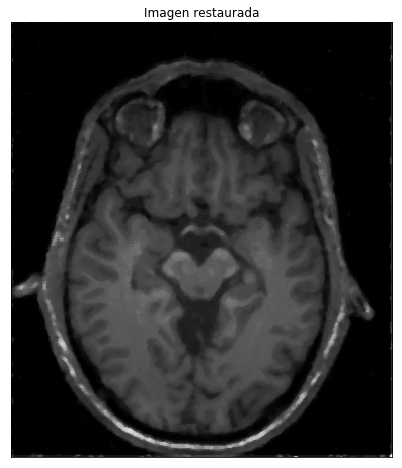

In [8]:
fig = plt.figure(figsize=(8,8))
plt.title('Imagen restaurada')
plt.imshow(im, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

## Parte B:
1. Perfilado de la imagen
2. Normalizacion 

El perfilado de la imagen consiste en sumar a la imagen original el laplaciano multiplicado por un factor de ponderacion k.
De esta forma se consigue resaltar los bordes de la imagen, lo cual es util en tareas de segmentacion. 

Debido a que el operador Laplaciano es sensible al ruido, usaremos el filtro Laplaciano de una Gaussiana (LoG) el cual suaviza la imagen con una Gaussiana con la desviacion estandar especificada como argumento (para eliminar el ruido) y posteriormente se aplica el operador Laplaciano.  

In [9]:
# Aplicar el filtro laplaciano de gaussiana
imLap = ndimage.gaussian_laplace(im, sigma=6)

In [10]:
# Realizar perfilado de la imagen
k = 8
imNew = im + k*imLap

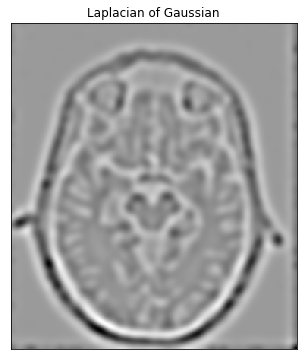

In [11]:
fig2 = plt.figure(figsize=(6,6))
plt.imshow(imLap, cmap='gray')
plt.title('Laplacian of Gaussian')
plt.xticks([])
plt.yticks([])
plt.show()

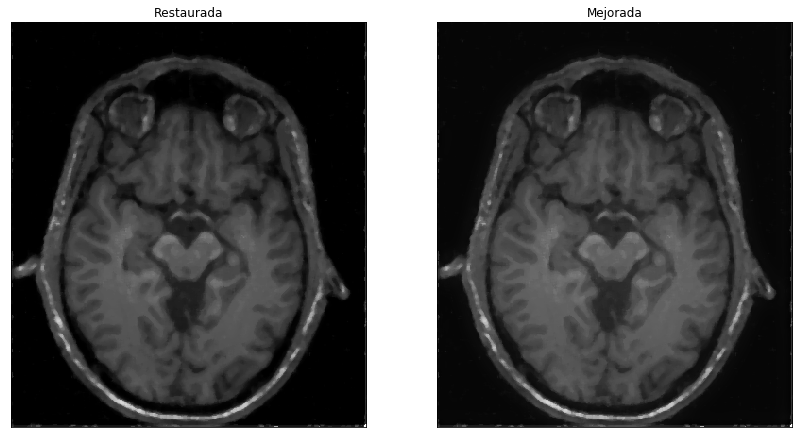

In [12]:
fig3 = plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.title('Restaurada')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(imNew, cmap='gray')
plt.title('Mejorada')
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
imMin = np.min(imOriginal)
imMax = np.max(imOriginal)

print('Valor minimo = ', imMin)
print('Valor maximo = ', imMax)

Valor minimo =  0
Valor maximo =  255


Los niveles de gris de la imagen original son del [0, 255], mientras que los niveles de gris de la imagen restaurada estan en el rango [0, 1]. Usando el comando cv2.normalize() se realiza un mapeo al rango de la imagen original.

In [14]:
imNew = cv2.normalize(imNew, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
imNew = imNew.astype(np.uint8)
im = cv2.normalize(im, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
im = im.astype(np.uint8)

In [15]:
# Verificamos que el tipo de dato de la imagen sea un entero de 8 bits
imNew.dtype

dtype('uint8')

## Parte C
Separar el mesencefalo del resto de la imagen.
Para lograr esta separacion, realizare los siguientes pasos:
1. Aplicar detector de bordes Canny

In [184]:
imEdges = cv2.Canny(imNew, 60, 100, 3, L2gradient=True)

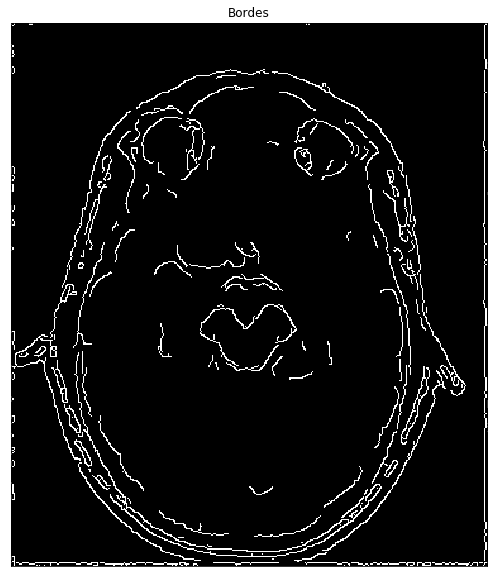

In [185]:
fig4 = plt.figure(figsize=(10,10))
plt.imshow(imEdges, cmap='gray')
plt.title('Bordes')
plt.xticks([])
plt.yticks([])
plt.show()

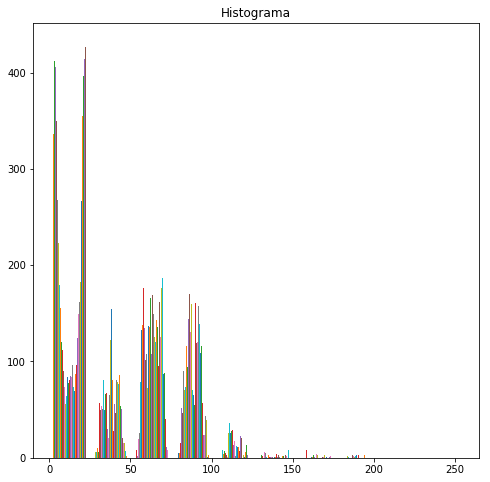

In [44]:
fig5 = plt.figure(figsize=(8,8))
plt.hist(imNew)
plt.title('Histograma')
plt.show()

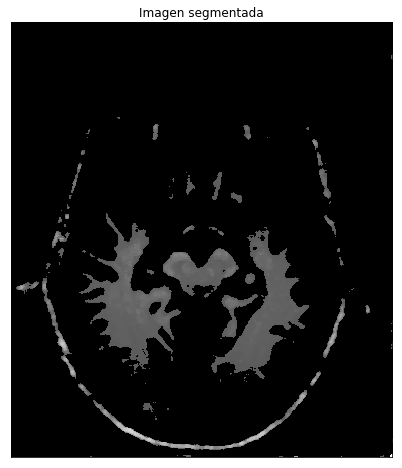

In [47]:
# Segmentacion usando umbral, basado en el histograma
_,imSeg = cv2.threshold(imNew,90,95,cv2.THRESH_TOZERO)

plt.figure(figsize=(8,8))
plt.imshow(imSeg, cmap='gray')
plt.title('Imagen segmentada')
plt.xticks([])
plt.yticks([])
plt.show()

In [152]:
imSeg.shape

(430, 377)